In [4]:
# Including libraries into the R environment
library(tidyverse)
library(rvest)
library(dplyr)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:purrr':

    pluck

The following object is masked from 'package:readr':

    guess_encoding



In [3]:
#URL for Suicidal rates for 2016
url_suicide_rate <- "https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate"

In [3]:
#Fetching data from web page as an HTML table
data_suicide_rate <- url_suicide_rate %>%
                     read_html()%>%
                     html_nodes(xpath='//*[@id="mw-content-text"]/div/table[3]')%>%
                     html_table()

In [3]:
#Converting HTML table to a DataFrame
data_suicide_rate <- data_suicide_rate %>% as.data.frame() %>%
                      select(Country, Both.sexes, Male, Female) %>%
                      rename('Suicide Rates 2016 (per 100,000 People)' = Both.sexes,
                             'Suicide Rates 2016 (Males)' = Male, 
                             'Suicide Rates 2016 (Females)' = Female) 

In [3]:
#Printing the data frame
data_suicide_rate

Country,"Suicide Rates 2016 (per 100,000 People)",Suicide Rates 2016 (Males),Suicide Rates 2016 (Females)
Guyana (more info),30.2,46.6,14.2
Lesotho,28.9,22.7,32.6
Russia (more info),26.5,48.3,7.5
Lithuania (more info),25.7,47.5,6.7
Suriname,23.2,36.1,10.9
Cote d'Ivoire,23.0,32.0,13.0
Kazakhstan (more info),22.8,40.1,7.7
Equatorial Guinea,22.0,31.3,10.8
Belarus,21.4,39.3,6.2
South Korea (more info),20.2,29.6,11.6


In [5]:
#URL for Health Expenditure
url_health_expenditure <- 'https://en.wikipedia.org/wiki/List_of_countries_by_total_health_expenditure_per_capita'

In [5]:
#Fetching data from web page as an HTML table
data_health_expenditure <- url_health_expenditure %>%
                           read_html() %>%
                           html_nodes(xpath='//*[@id="mw-content-text"]/div/table[1]/tbody/tr                                        /td[2]/table') %>%
                           html_table()

In [5]:
#Converting HTML table to a DataFrame
data_health_expenditure <- data_health_expenditure%>% as.data.frame() %>%         
                           select(Country, X2016) 

In [5]:
#Renaming column names of the Data Frame 
data_health_expenditure <- data_health_expenditure%>%
                          rename('Health Expenditure 2016 (Per Capita in dollars)' = X2016)

In [5]:
#Changing character data type to numeric after removing the commas in the figures using gsub()  
data_health_expenditure[['Health Expenditure 2016 (Per Capita in dollars)']] <-    
            gsub(",","",data_health_expenditure[['Health Expenditure 2016 (Per Capita in dollars)']]) %>% 
            as.numeric()

In [5]:
#Printing the data frame
data_health_expenditure

Country,Health Expenditure 2016 (Per Capita in dollars)
Australia,4708
Austria,5227
Belgium,4840
Canada,4753
Chile,1977
Czech Republic,2544
Denmark,5205
Estonia,1989
Finland,4033
France,4600


In [42]:
#Merging the data sets for Suicidal Rates and Health Expenditure for different countries using INNER JOIN
data_merged <- data_suicide_rate
data_merged <- inner_join(x= data_suicide_rate, y = data_health_expenditure, by = "Country")

In [42]:
#Printing the DataSet
data_merged

Country,"Suicide Rates 2016 (per 100,000 People)",Suicide Rates 2016 (Males),Suicide Rates 2016 (Females),Health Expenditure 2016 (Per Capita in dollars)
Latvia,17.2,31.0,5.1,1466
Belgium,15.7,22.2,9.4,4840
Estonia,14.4,25.6,4.4,1989
Finland,13.8,20.8,6.8,4033
Hungary,13.6,22.2,6.2,2101
Poland,13.4,23.9,3.4,1798
Iceland,13.3,21.7,4.7,4376
Slovenia,13.3,22.4,4.5,2835
New Zealand,11.6,17.3,6.2,3590
Austria,11.4,17.5,5.7,5227


In [41]:
#Creating CSV for the above merged dataset
write.csv(data_merged, file="Health_Expenditure_Merged.csv")

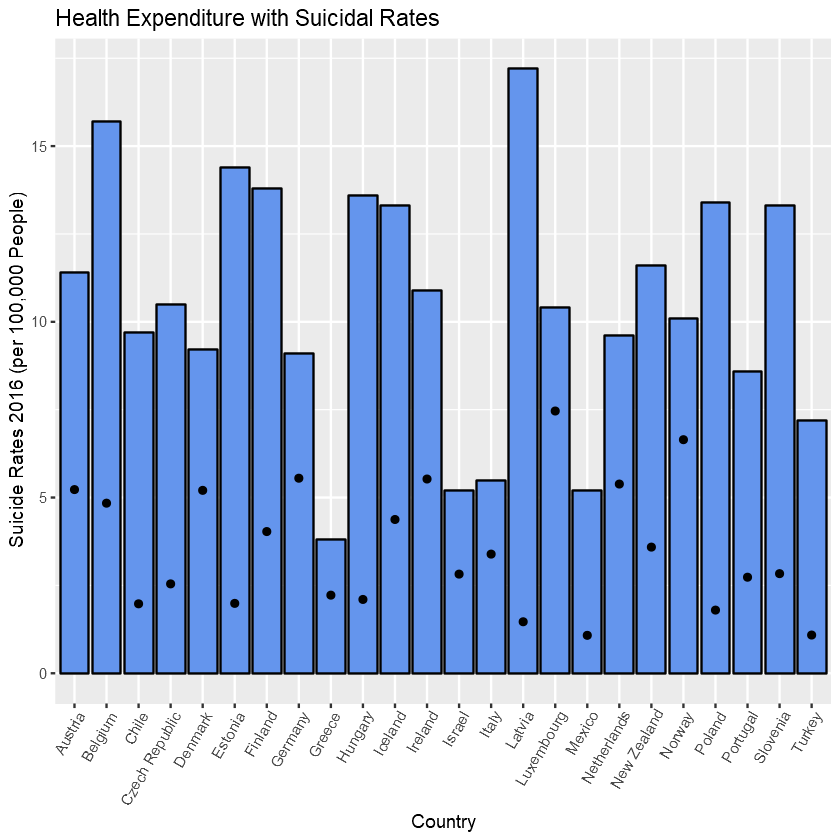

In [16]:
# Visualizing the relation of suicidal rates with Health Expenditure for different countries using a bar plot
  ggplot(data_merged, aes(Country, `Suicide Rates 2016 (per 100,000 People)`)) +#, fill=Country)) +
  geom_bar(stat='identity', color='black', fill = 'cornflowerblue') +
  theme(axis.text.x = element_text(angle=60, hjust=1)) +
  geom_point(aes(y=`Health Expenditure 2016 (Per Capita in dollars)`/1000)) +ggtitle('Health Expenditure with Suicidal Rates')

Fig: The above graph shows the Suicide rates (per 100,000 people) for different countries along with the Health Expenditure shown as points on the bar chart. The graph comes out to be as expected for some countries, but for some of them it is bit different from the expectations. Like for Latvia, it can be seen that the expenditure on Healthcare is too low and therefore  the Suicidal rates are high. But for some other countries, like Luxembourg, even if the Health Expenditure is high, still the Suicidal rates are not low.

In [17]:
#Finding correlation between Suicidal rates and Health Expenditure
cor.test(data_merged[["Suicide Rates 2016 (per 100,000 People)"]], 
         data_merged[["Health Expenditure 2016 (Per Capita in dollars)"]])


	Pearson's product-moment correlation

data:  data_merged[["Suicide Rates 2016 (per 100,000 People)"]] and data_merged[["Health Expenditure 2016 (Per Capita in dollars)"]]
t = 0.34484, df = 22, p-value = 0.7335
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3401354  0.4630233
sample estimates:
       cor 
0.07332175 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


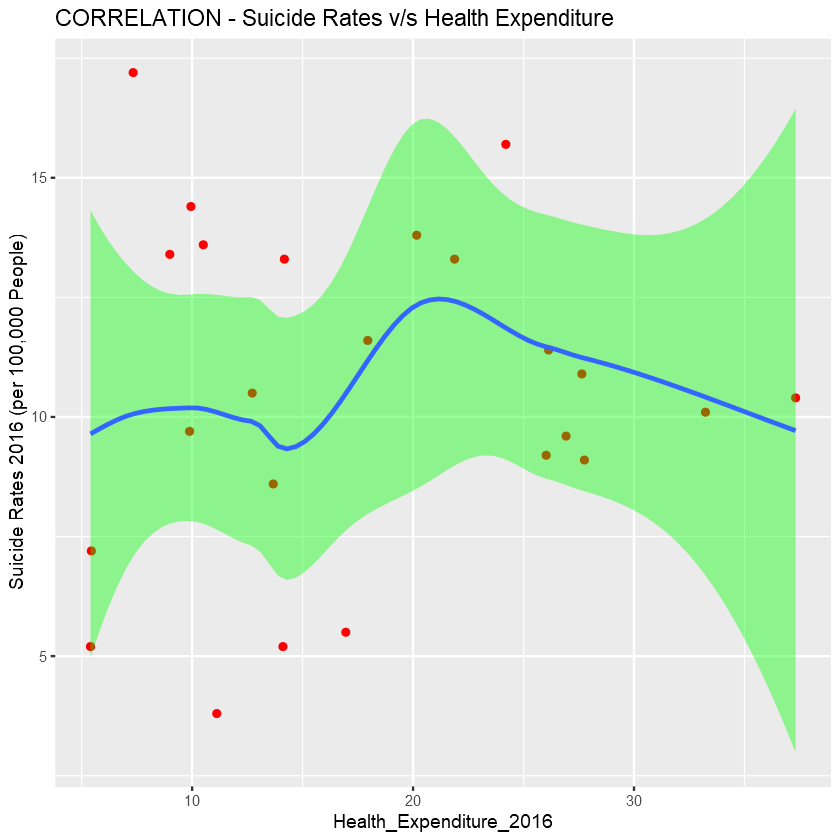

In [20]:
#Now plotting the above correlation between two quantitative variables using a scatteprlot  
    Health_Expenditure_2016 <- data_merged[["Health Expenditure 2016 (Per Capita in dollars)"]]/200
    ggplot(data_merged, aes(x=Health_Expenditure_2016, y=`Suicide Rates 2016 (per 100,000 People)`)) + 
    geom_point( color="red")+
    geom_smooth( fill="green") + ggtitle('CORRELATION - Suicide Rates v/s Health Expenditure')

Fig: The points are bit scattered on the Scatterplot and even the correlation value is too small to be considered.

In [21]:
#URL for Happiness
url_happiness_index <- "https://en.wikipedia.org/wiki/World_Happiness_Report#2016_World_Happiness_Report"

In [21]:
#Fetching data from web page as an HTML table
data_happiness_index <- url_happiness_index%>%
                        read_html()%>%
                        html_nodes(xpath = '//*[@id="mw-content-text"]/div/table[1]')%>%
                        html_table()

In [21]:
#Converting HTML table to a DataFrame
data_happiness_index <- data_happiness_index%>% as.data.frame()

In [21]:
#Printing the DataFrame
data_happiness_index

Overall.Rank,Country,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393
2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


In [49]:
# Merging the data set for Happiness Index with Suicidal rates of different countries and then selecting 
# the relevant columns for visualization and renaming them with names that are more readable
data_merged_happiness <- inner_join(x= data_suicide_rate, y = data_happiness_index, by = "Country") %>% select(Country, Score, `Suicide Rates 2016 (per 100,000 People)`) %>%
                         rename('Happiness Score' = Score)

In [49]:
#Prinitng the DataSet
data_merged_happiness

Country,Happiness Score,"Suicide Rates 2016 (per 100,000 People)"
Lesotho,3.808,28.9
Belarus,5.483,21.4
Zimbabwe,3.692,19.1
Nigeria,5.155,17.3
Latvia,5.933,17.2
Togo,3.999,16.6
Uruguay,6.379,16.5
Sierra Leone,4.571,16.1
Benin,4.141,15.7
Belgium,6.927,15.7


In [44]:
#Creating CSV file for the merged dataset
write.csv(data_merged_happiness, file="Happiness_Score_Merged.csv")

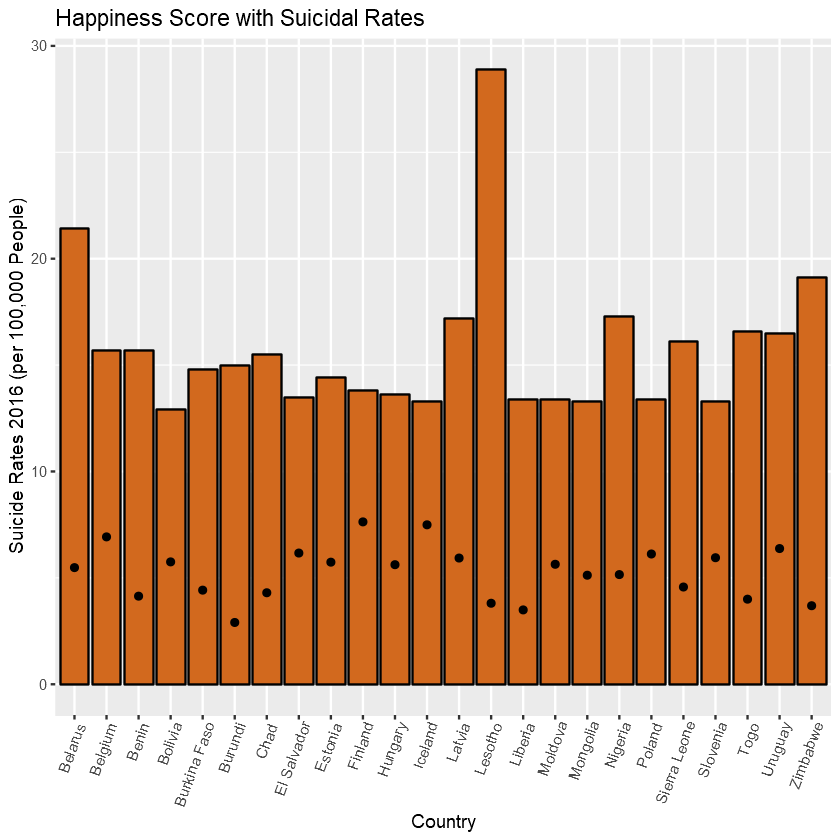

In [25]:
# Visualizing the relation of suicidal rates with Happiness Score for different countries using a bar plot
data_happiness_plot <- data_merged_happiness%>% head(24)
ggplot(data_happiness_plot, aes(Country, `Suicide Rates 2016 (per 100,000 People)`)) +#, fill=Country)) +
 geom_bar(stat='identity', color='black', fill = 'chocolate') +
  theme(axis.text.x = element_text(angle=70, hjust=1)) +
  geom_point(aes(y=`Happiness Score`), color="black") + ggtitle('Happiness Score with Suicidal Rates')

Fig: The above graph shows the Suicide rates (per 100,000 people) for different countries along with the Happiness Index shown as points on the bar chart. The results here are closer to what was expected than it was in the plot of Suiccidla rate with Health Expenditure. Like for Burundi, if the Happiness Index is low, the Suicide rate is high and that was the thing what was expected. However, for the country like Finland, even if the Happiness Score is high, the suicidal rates still comes out ot be high. Thus, there might be some other issues than Happiness Score that need to be considered to reach some conclusion about the number of suicides

In [27]:
#Finding correlation between Suicidal rates and Happiness Score of different countries
cor.test(data_merged_happiness[["Suicide Rates 2016 (per 100,000 People)"]], 
         data_merged_happiness[["Happiness Score"]])
#As expected the correlation comes out to be negative


	Pearson's product-moment correlation

data:  data_merged_happiness[["Suicide Rates 2016 (per 100,000 People)"]] and data_merged_happiness[["Happiness Score"]]
t = -1.3605, df = 106, p-value = 0.1766
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.31224930  0.05943988
sample estimates:
       cor 
-0.1310056 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


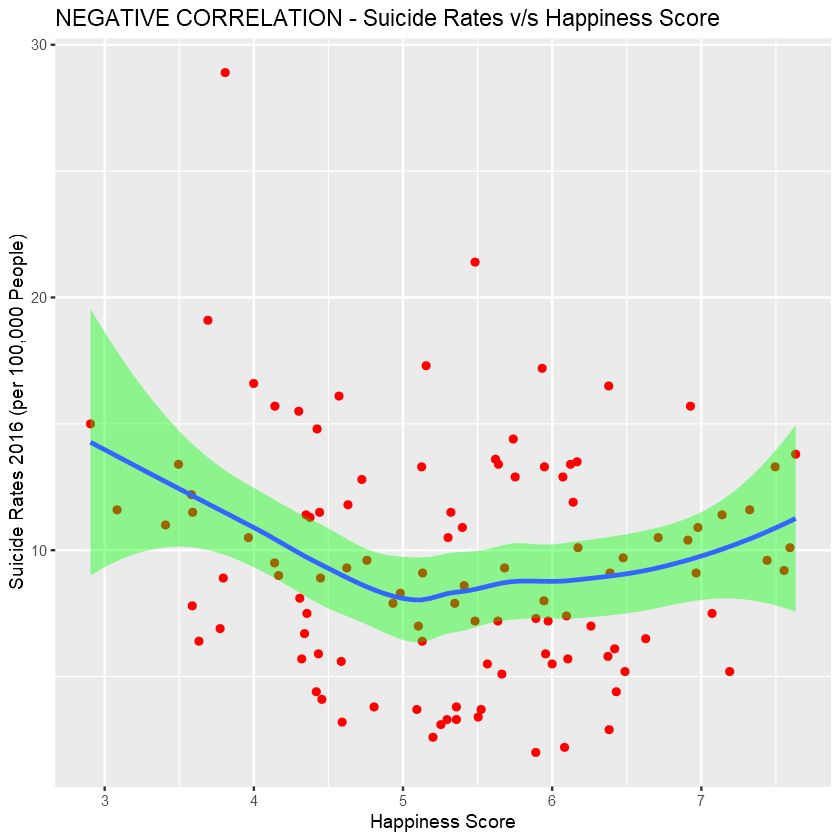

In [28]:
#Plotting the above correlation between two quantitative variables,i.e, Suicidal Rates and Happiness Score using a scatteprlot  
ggplot(data_merged_happiness, aes(x=`Happiness Score`, y=`Suicide Rates 2016 (per 100,000 People)`)) + 
       geom_point( color="red")+
       geom_smooth( fill="green") +  ggtitle('NEGATIVE CORRELATION - Suicide Rates v/s Happiness Score')

We cannot consider the correlation of the Suicidal Rate and Happiness Score as significant. However it comes out to be negative which was expected as Suicidal Rate is inversely proportional to the Happiness score, and the inclination of the model line should be negative.

In [30]:
#URL for GDP of different coountries
url_GDP <- 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'

In [30]:
#Fetching data from web page as an HTML table
data_GDP <- url_GDP %>% read_html() %>%
                        html_nodes(xpath='//*[@id="mw-content-text"]/div/table/tbody/tr[2]/td[3]/table') %>%
                        html_table()

In [30]:
#Converting HTML table to a DataFrame
data_GDP <- data_GDP %>% as.data.frame()

In [30]:
#Wrangling the data by removing the commas from the figures which might have vreated a problem in some further computations
data_GDP$US. <-  gsub(",","", data_GDP$US.)%>%
                 as.numeric()

In [30]:
#Renaming the columns for some readable names
data_GDP <- data_GDP %>% rename('GDP (in US dollars)'=US.)

In [30]:
#Printing the Data Set
data_GDP

Rank,Country,GDP (in US dollars)
1,Monaco,168004
2,Liechtenstein,164437
3,Luxembourg,101835
—,Bermuda,99363
4,Switzerland,79609
—,Macau,73187
5,Norway,70617
6,Ireland,64497
—,Cayman Islands,63261
7,Iceland,60966


In [45]:
#Merging the Health Expenditure DataSet with GDP DataSet so that we can do some further calculations
data_merged_temp <- inner_join(x= data_health_expenditure, y = data_GDP, by = "Country")

In [45]:
#Merging the above data set with the Suicidal Rate dataset to include the suicidal rates into that data set as well.
data_merged_GDP <- inner_join(x= data_suicide_rate, y= data_merged_temp, by="Country")

In [45]:
#Selecting the relevant columns using select()
data_merged_GDP <- data_merged_GDP %>% select(`Country`, `GDP (in US dollars)`, `Health Expenditure 2016 (Per Capita in dollars)`, `Suicide Rates 2016 (per 100,000 People)`)

In [45]:
#Calculating the percentage of Helath Expenditure as a proportion of the total GDP of that country using mutate()
# and add these values as a separate column in the merged dataset
data_merged_GDP <- data_merged_GDP %>% mutate(`Health Expenditure (as %age of GDP)` = (data_merged_GDP$`Health Expenditure 2016 (Per Capita in dollars)` /`GDP (in US dollars)`)*100 )

In [50]:
#Prinitng the final dataset
data_merged_GDP

Country,GDP (in US dollars),Health Expenditure 2016 (Per Capita in dollars),"Suicide Rates 2016 (per 100,000 People)",Health Expenditure (as %age of GDP)
Latvia,13993,1466,17.2,10.476667
Belgium,41199,4840,15.7,11.747858
Estonia,17782,1989,14.4,11.185468
Finland,43339,4033,13.8,9.305706
Hungary,12900,2101,13.6,16.286822
Poland,12332,1798,13.4,14.579955
Iceland,60966,4376,13.3,7.177771
Slovenia,21517,2835,13.3,13.175629
New Zealand,40233,3590,11.6,8.923023
Austria,44857,5227,11.4,11.652585


In [48]:
#Creating a CSV for the above merged dataset
write.csv(data_merged_GDP, file="GDP_Percentage_Merged.csv")

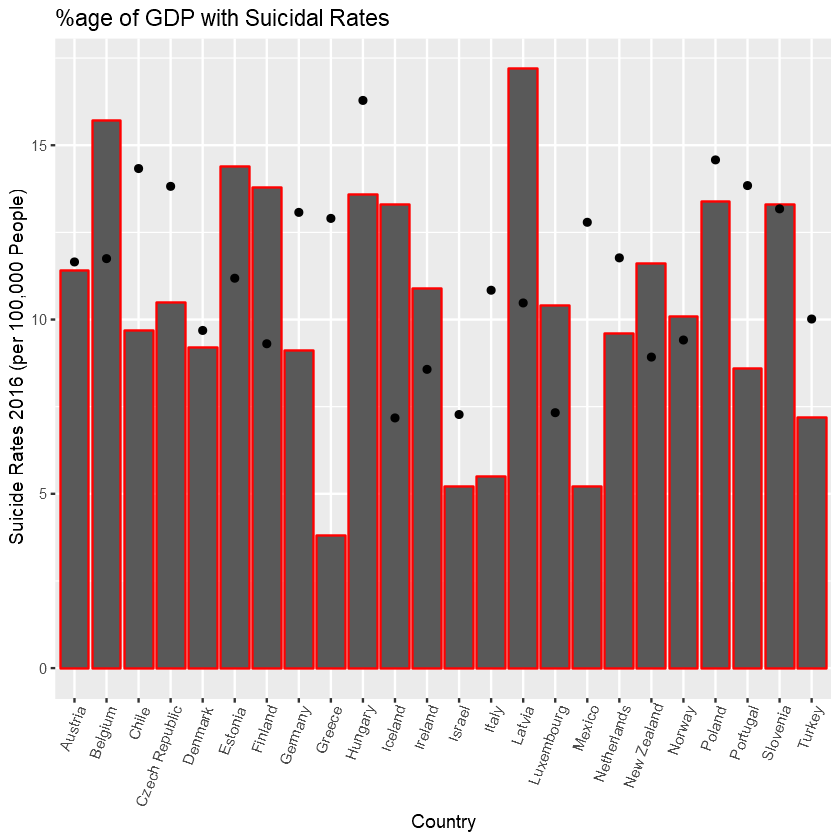

In [37]:
#Visualizing the relation of suicidal rates with Percentage of the GDP spent for the Health Expenditure 
 ggplot(data_merged_GDP, aes(Country, `Suicide Rates 2016 (per 100,000 People)`)) +
             geom_bar(stat='identity', color='red') +
             theme(axis.text.x = element_text(angle=70, hjust=1)) +
             geom_point(aes(y=`Health Expenditure (as %age of GDP)`)) + ggtitle('%age of GDP with Suicidal Rates')

Fig: The above graph shows the Suicide rates (per 100,000 people) for different countries along with the Health Expenditure shown as Percentage of the GDP of that country. The unexpected results were seen for the countries like Hungary and Poland where high percentage of the GDP was spent on the Healthcare and still they are having high suicidal rates. 

In [38]:
#Finding correlation between Suicidal rates and Percentage of the GDP spent for the Health Expenditure 
cor.test(data_merged_GDP[["Suicide Rates 2016 (per 100,000 People)"]], 
         data_merged_GDP[["Health Expenditure (as %age of GDP)"]])


	Pearson's product-moment correlation

data:  data_merged_GDP[["Suicide Rates 2016 (per 100,000 People)"]] and data_merged_GDP[["Health Expenditure (as %age of GDP)"]]
t = 0.17335, df = 22, p-value = 0.864
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3720051  0.4338666
sample estimates:
       cor 
0.03693412 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


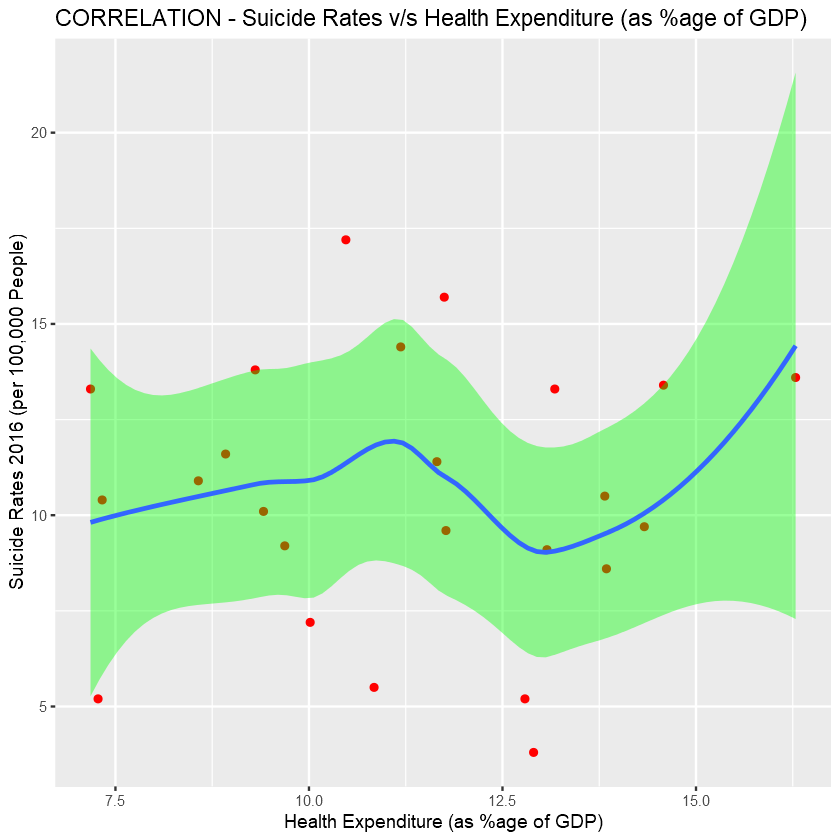

In [5]:
# Plotting the above correlation between two quantitative variables,
# i.e, Suicidal Rates and Happiness Score using a scatteprlot  
ggplot(data_merged_GDP, aes(x=`Health Expenditure (as %age of GDP)`, y=`Suicide Rates 2016 (per 100,000 People)`)) + 
          geom_point( color="red")+
          geom_smooth( fill="green") +  
          ggtitle('CORRELATION - Suicide Rates v/s Health Expenditure (as %age of GDP)')

Fig: The correlation doesn't comes out to be significant and there might be some other factors involved that affects the Suicidal Rates.